In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

# **Data Preprocessing**

In [2]:
df1 = pd.read_csv("data/social-media.csv")
df2 = pd.read_csv("data/social_media_usage.csv")
df3 = pd.read_csv("data/dummy_data.csv")


In [3]:
df1

,UserId,UsageDuraiton,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2
...,...,...,...,...,...
58,58,2,51,Turkey,1
59,59,8,19,Germany,15
60,60,2,20,Bulgaria,4
61,61,9,18,Germany,18


In [4]:
df2

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21
...,...,...,...,...,...,...
995,U_996,LinkedIn,479,4,72,15
996,U_997,Instagram,499,14,110,49
997,U_998,Facebook,318,6,105,9
998,U_999,TikTok,305,15,151,6


In [5]:
print(df1.columns)
print(df2.columns)

Index(['UserId', 'UsageDuraiton', 'Age', 'Country', 'TotalLikes'], dtype='object')
Index(['User_ID', 'App', 'Daily_Minutes_Spent', 'Posts_Per_Day',
       'Likes_Per_Day', 'Follows_Per_Day'],
      dtype='object')


## Analysing Dataset 1 to gain insights and generate synthetic data for the overall dataset


In [6]:
df1.rename(columns={'UserID':'User_ID'}, inplace=True)


In [7]:
age_bins = list(range(16,67,10))
age_labels = [f"{x}-{x+9}" for x in age_bins[:-1]]

df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

max_mins_by_age_grp = df1.groupby('Age_Group')['UsageDuraiton'].max().reset_index()

print(max_mins_by_age_grp)

  Age_Group  UsageDuraiton
0     16-25             13
1     26-35              9
2     36-45              6
3     46-55              3
4     56-65              2


<ipython-input-7-97134dd2e687>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_mins_by_age_grp = df1.groupby('Age_Group')['UsageDuraiton'].max().reset_index()


In [8]:
age_bins = list(range(16,67,10))
age_labels = [f"{x}-{x+9}" for x in age_bins[:-1]]

df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

max_mins_by_age_grp = df1.groupby('Age_Group')['UsageDuraiton'].max().reset_index()

print(max_mins_by_age_grp)

  Age_Group  UsageDuraiton
0     16-25             13
1     26-35              9
2     36-45              6
3     46-55              3
4     56-65              2


<ipython-input-8-97134dd2e687>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_mins_by_age_grp = df1.groupby('Age_Group')['UsageDuraiton'].max().reset_index()


## Insights from this

df2 has max value of 500 minutes - from this we can understand that for every 3 hour the age demographic and have 4 intervals

So we can split the 500 minutes into 4 intervals

1. 0-100 mins ===> 46-65
2. 101-230 mins ==> 36-45
3. 231-350 mins ==> 26-35
4. '>351 ==> 18-25



In [9]:
#Instead of non binary - it is changed to not mentioned

df3.loc[df3['gender'] == 'non-binary', 'gender'] = 'not-specified'

In [10]:
age_bins = list(range(16,67,10))
age_labels = [f"{x}-{x+9}" for x in age_bins[:-1]]

df3['Age_Group'] = pd.cut(df3['age'], bins=age_bins, labels=age_labels, right=False)

max_mins_by_age_grp = df3.groupby('Age_Group')['gender'].value_counts()

print(max_mins_by_age_grp)
print(df3['gender'].value_counts())

Age_Group  gender       
16-25      female           62
           not-specified    59
           male             56
26-35      not-specified    70
           male             62
           female           60
36-45      male             92
           female           70
           not-specified    69
46-55      not-specified    81
           female           75
           male             67
56-65      female           64
           male             60
           not-specified    53
Name: count, dtype: int64
gender
male             337
not-specified    332
female           331
Name: count, dtype: int64


<ipython-input-10-81ff35d0f17d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_mins_by_age_grp = df3.groupby('Age_Group')['gender'].value_counts()


In [11]:
print(df1['Country'].value_counts)

<bound method IndexOpsMixin.value_counts of 0           Turkey
1           Canada
2          Ireland
3     South Africa
4           Turkey
          ...     
58          Turkey
59         Germany
60        Bulgaria
61         Germany
62          Panama
Name: Country, Length: 63, dtype: object>


### the df3 and df2 have 1000 rows each so, the needed columns are concatenated to the dataset we are gonna use


## Synthetic Data Generation for the Bigger Dataset


In [12]:
import numpy as np

# Define a function to assign random age based on 'Daily Minutes Spent'
def assign_age(minutes_spent):
    if minutes_spent <= 100:
        return np.random.randint(46, 66)  # Random age between 46 and 65
    elif 101 <= minutes_spent <= 230:
        return np.random.randint(36, 46)  # Random age between 36 and 45
    elif 231 <= minutes_spent <= 350:
        return np.random.randint(26, 36)  # Random age between 26 and 35
    else:
        return np.random.randint(18, 26)  # Random age between 18 and 25

# Apply the function to the 'Daily_Minutes_Spent' column in df2 to create a new 'Age' column
df2['Age'] = df2['Daily_Minutes_Spent'].apply(assign_age)

# Check the updated dataframe
df2.head()


,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day,Age
0,U_1,Pinterest,288,16,94,0,26
1,U_2,Facebook,192,14,117,15,38
2,U_3,Instagram,351,13,120,48,22
3,U_4,TikTok,21,20,117,8,53
4,U_5,LinkedIn,241,16,9,21,28


### Concatenating the Gender, country and the demographics column from the third dataset df3 to the df2

In [13]:
df2['Gender'] = df3['gender']
df2['Country'] = df3['location']
df2['Demographic'] = df3['demographics']

In [14]:
df2[['Gender', 'Country', 'Demographic']] = df2[['Gender', 'Country', 'Demographic']].apply(lambda x: x.sample(frac=1).reset_index(drop=True))


In [15]:
df2

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day,Age,Gender,Country,Demographic
0,U_1,Pinterest,288,16,94,0,26,female,Australia,Urban
1,U_2,Facebook,192,14,117,15,38,not-specified,Australia,Urban
2,U_3,Instagram,351,13,120,48,22,male,United States,Urban
3,U_4,TikTok,21,20,117,8,53,not-specified,Australia,Urban
4,U_5,LinkedIn,241,16,9,21,28,male,Australia,Urban
...,...,...,...,...,...,...,...,...,...,...
995,U_996,LinkedIn,479,4,72,15,20,not-specified,United States,Urban
996,U_997,Instagram,499,14,110,49,20,male,Australia,Rural
997,U_998,Facebook,318,6,105,9,29,not-specified,United Kingdom,Urban
998,U_999,TikTok,305,15,151,6,28,not-specified,Australia,Sub_Urban


## Final cleaned and processed Dataset

In [16]:
data = df2.copy()

In [17]:
data.columns

Index(['User_ID', 'App', 'Daily_Minutes_Spent', 'Posts_Per_Day',
       'Likes_Per_Day', 'Follows_Per_Day', 'Age', 'Gender', 'Country',
       'Demographic'],
      dtype='object')

# Exploratory Data Analysis

## **Charts with Simple and clear Insights**

### 1. Users per App

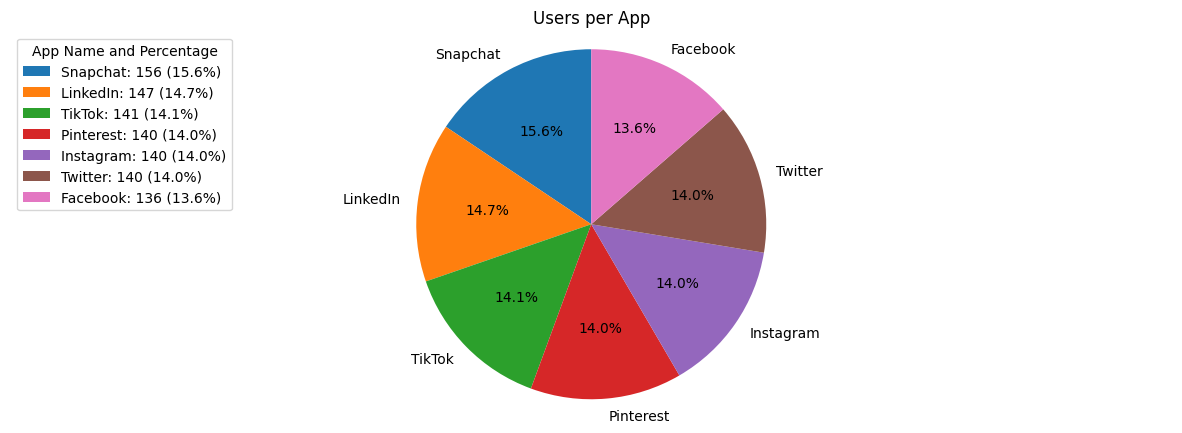

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
# Data (assuming 'data' is the DataFrame)
labels = data['App'].value_counts().index
sizes = data['App'].value_counts().values
percentages = [f"{label}: {size} ({size / sum(sizes) * 100:.1f}%)" for label, size in zip(labels, sizes)]

# Pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Adding legend with app name and percentage of users
plt.legend(percentages, title="App Name and Percentage", loc="upper left")

# Display plot
plt.title('Users per App')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### 2. Gender distribution within each country

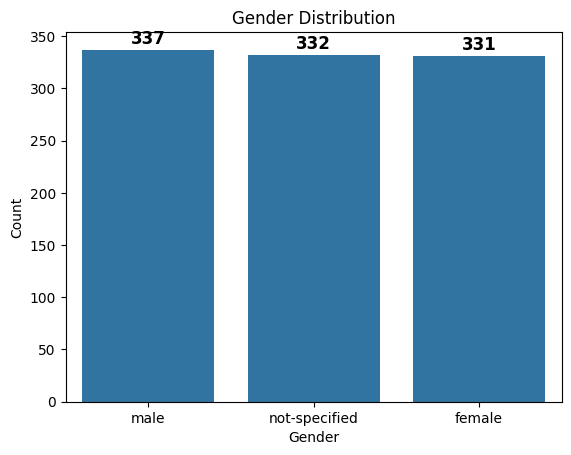

In [19]:
#  Create the barplot and store the axis in 'ax'
ax = sns.barplot(x=data['Gender'].value_counts().index, y=data['Gender'].value_counts().values)

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # The count value inside the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                ha='center', va='center',  # Horizontal and vertical alignment
                fontsize=12, color='black', fontweight='bold',  # Font properties
                xytext=(0, 8), textcoords = 'offset points')  # Offset text slightly above the bar

# Display plot
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


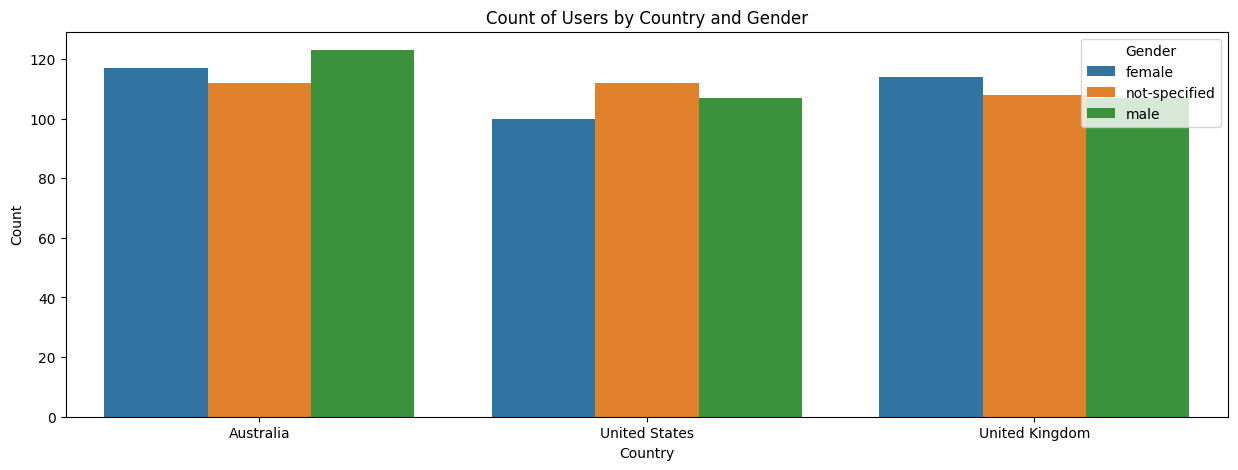

In [20]:

# Set the figure size
plt.figure(figsize=(15, 5))

# Create the barplot for count of users by Country and Gender
sns.countplot(x='Country', hue='Gender', data=data)

# Add legend
plt.legend(title='Gender', loc='upper right')

# Add titles and labels
plt.title('Count of Users by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Count')

# Display the plot
plt.show()


### 3. Map chart for users per **country**

In [21]:

country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'User_Count']

# Create the choropleth map
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="User_Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Count of Users by Country")

# Update layout for better aesthetics
fig.update_layout(
    geo=dict(showcoastlines=True),
    autosize=True,
    margin={"r":0,"t":40,"l":0,"b":0},
    legend_title="User Count"
)

# Show the map
fig.show()


### 4. Cluster analysis of the usage metrics

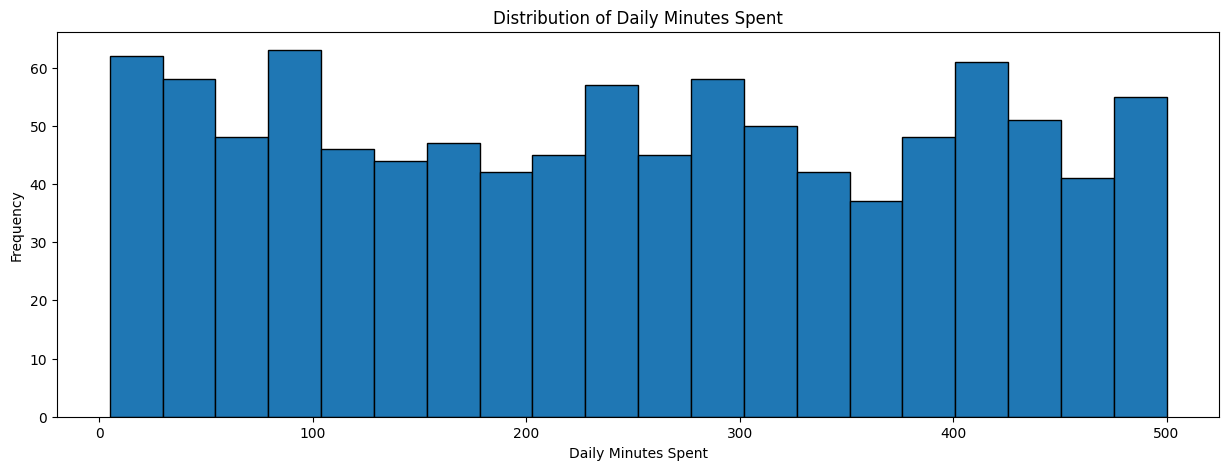

In [22]:
# Plotting the histogram
plt.figure(figsize=(15, 5))
plt.hist(data['Daily_Minutes_Spent'], bins=20, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Daily Minutes Spent')
plt.xlabel('Daily Minutes Spent')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### 5. Age vs Time Spent Daily

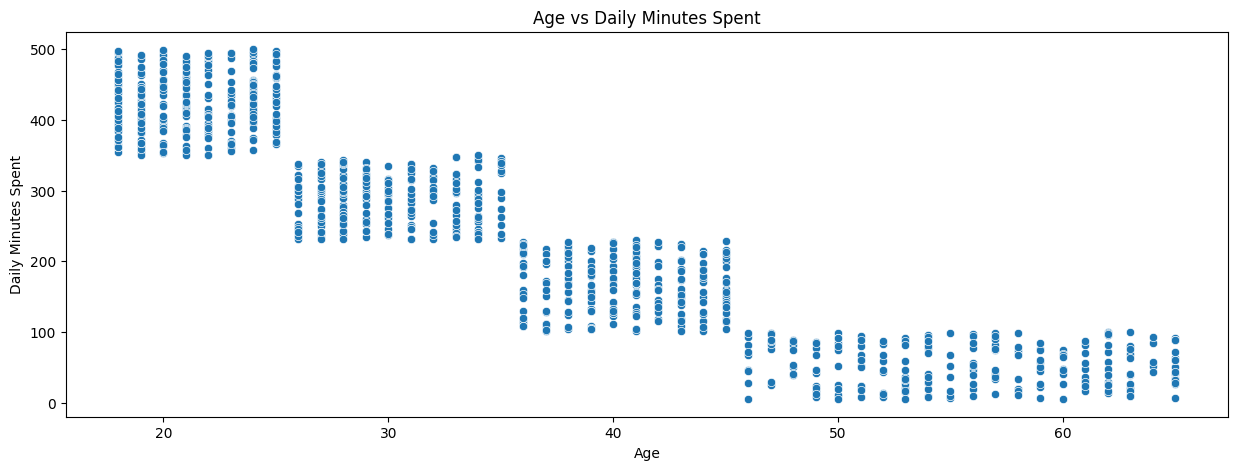

In [23]:
# Plotting the scatter plot
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data['Age'], y=data['Daily_Minutes_Spent'])

# Add titles and labels
plt.title('Age vs Daily Minutes Spent')
plt.xlabel('Age')
plt.ylabel('Daily Minutes Spent')

# Display the plot
plt.show()


### 6. Boxplot to show the spread of data distribution

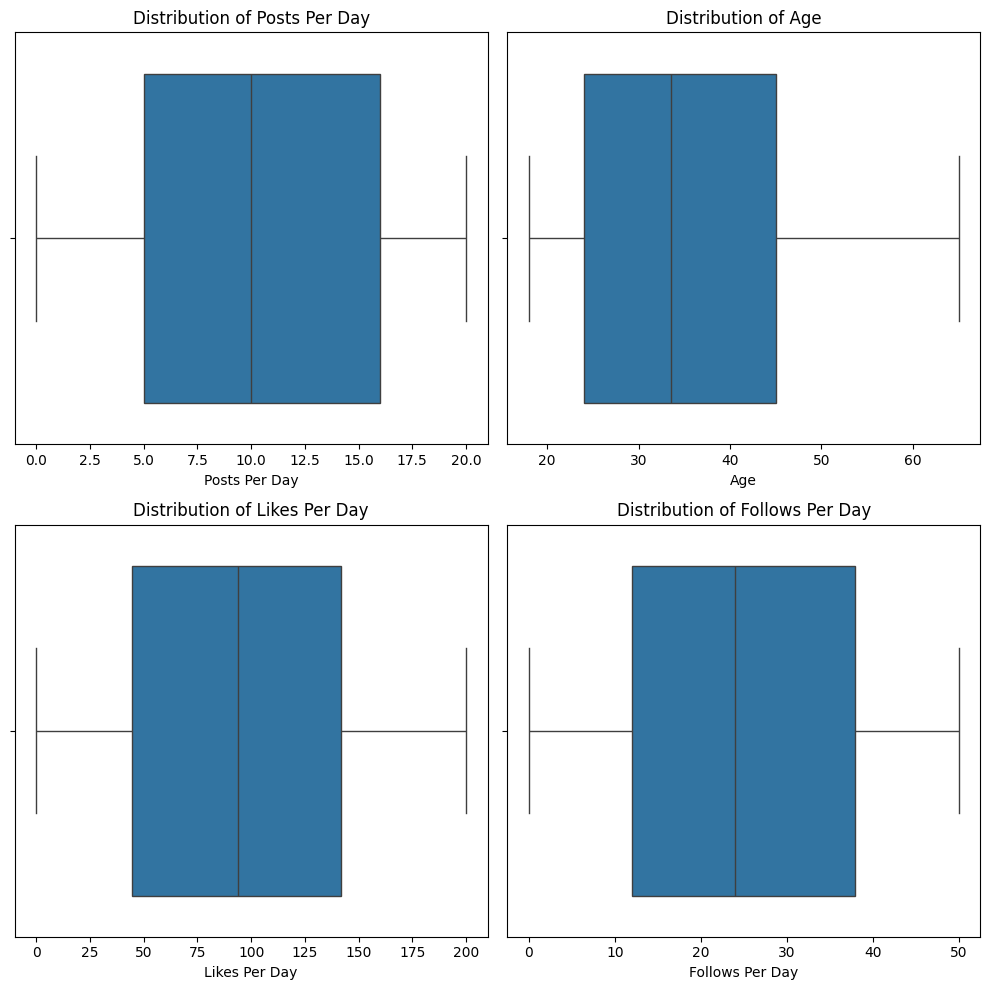

In [27]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Boxplot for Posts_Per_Day
sns.boxplot(x=data['Posts_Per_Day'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Posts Per Day')
axes[0, 0].set_xlabel('Posts Per Day')

# Boxplot for Age
sns.boxplot(x=data['Age'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')

# Boxplot for Likes Per Day
sns.boxplot(x=data['Likes_Per_Day'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Likes Per Day')
axes[1, 0].set_xlabel('Likes Per Day')

# Boxplot for Follows Per Day
sns.boxplot(x=data['Follows_Per_Day'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Follows Per Day')
axes[1, 1].set_xlabel('Follows Per Day')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


### 7. Violin Plot for mins vs demography

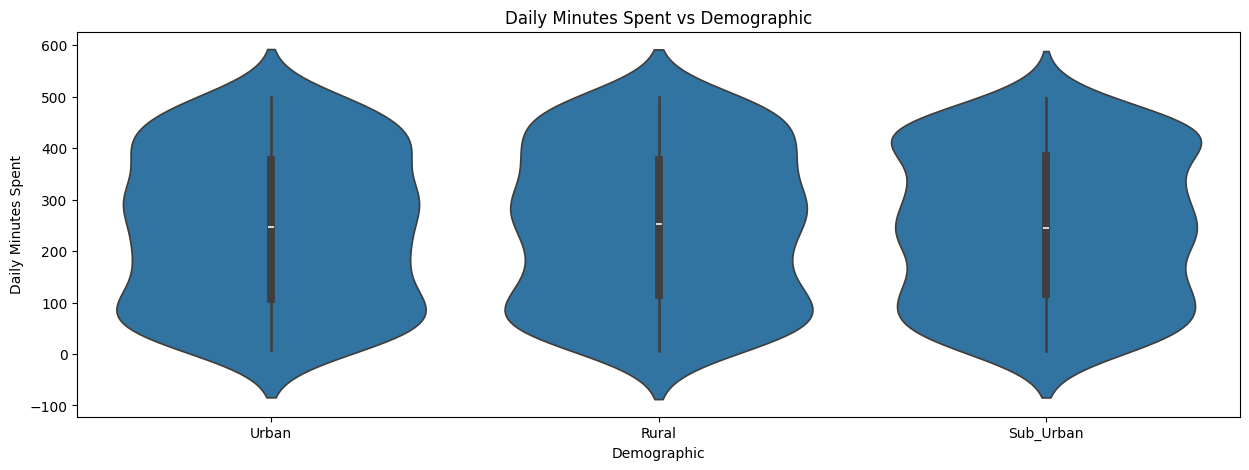

In [28]:
# Plotting the violin plot
plt.figure(figsize=(15, 5))
sns.violinplot(x=data['Demographic'], y=data['Daily_Minutes_Spent'])

# Add title and labels
plt.title('Daily Minutes Spent vs Demographic')
plt.xlabel('Demographic')
plt.ylabel('Daily Minutes Spent')

# Display the plot
plt.show()


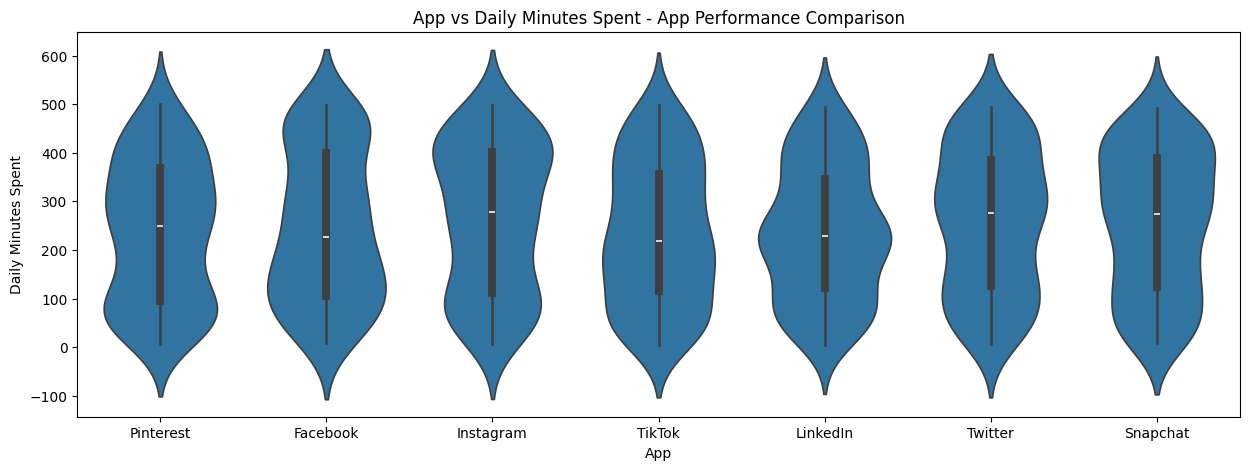

In [33]:
# Plotting the violin plot
plt.figure(figsize=(15, 5))
sns.violinplot(x=data['App'], y=data['Daily_Minutes_Spent'])

# Add title and labels
plt.title('App vs Daily Minutes Spent - App Performance Comparison')
plt.xlabel('App')
plt.ylabel('Daily Minutes Spent')

# Display the plot
plt.show()


### 8. App vs Daily_Minutes_Spent - Trend Analysis (Line Chart)

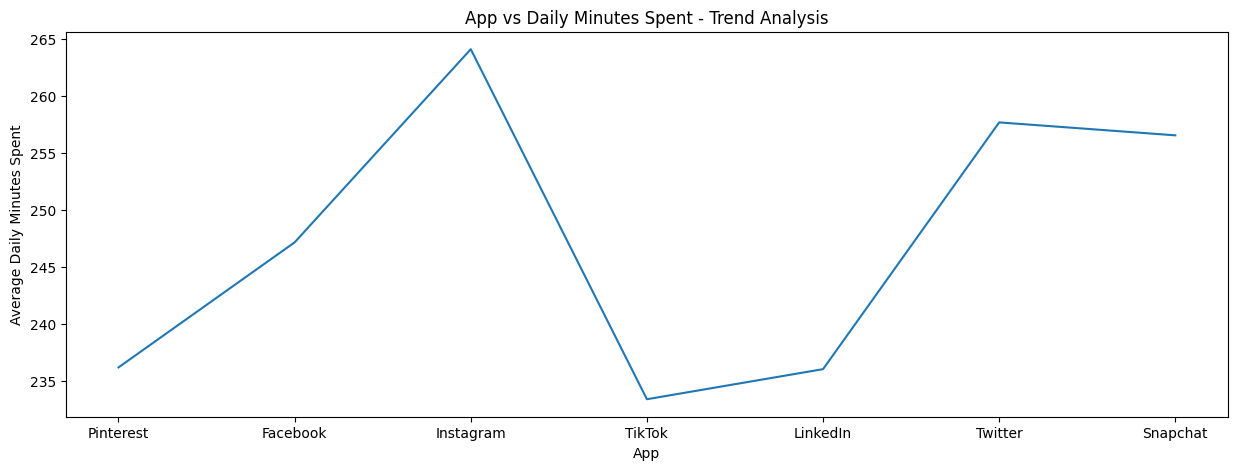

In [32]:
# Plotting the line chart
plt.figure(figsize=(15, 5))
sns.lineplot(x=data['App'], y=data['Daily_Minutes_Spent'], estimator='mean', errorbar=None)

# Add title and labels
plt.title('App vs Daily Minutes Spent - Trend Analysis')
plt.xlabel('App')
plt.ylabel('Average Daily Minutes Spent')

# Display the plot
plt.show()


### 9. Posts_Per_Day, Likes_Per_Day, Follows_Per_Day - Cluster Analysis

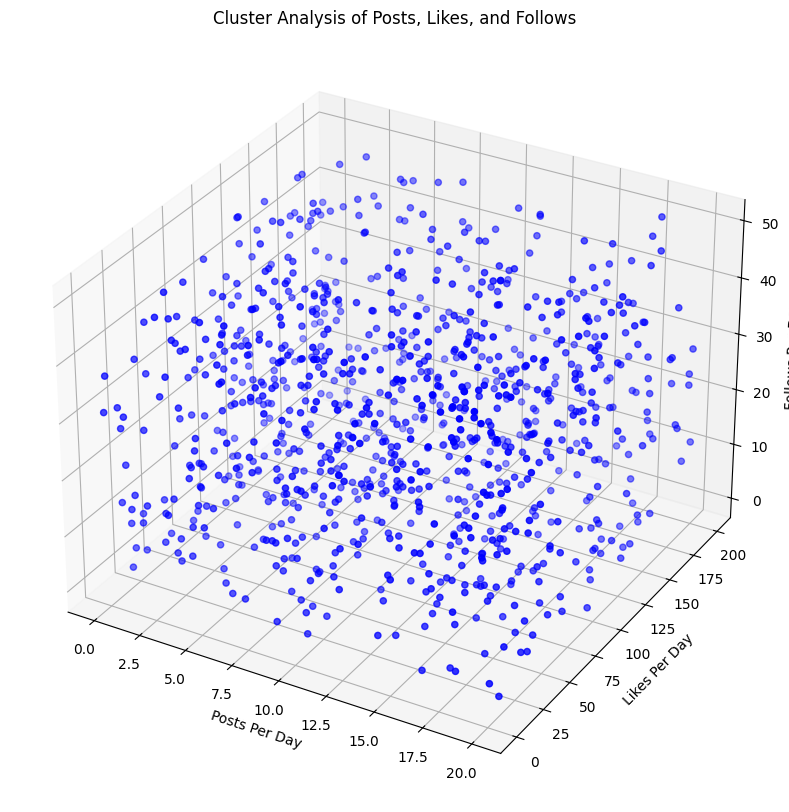

In [30]:
# Plotting the 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Posts_Per_Day'], data['Likes_Per_Day'], data['Follows_Per_Day'], c='b', marker='o')

# Add title and labels
ax.set_title('Cluster Analysis of Posts, Likes, and Follows')
ax.set_xlabel('Posts Per Day')
ax.set_ylabel('Likes Per Day')
ax.set_zlabel('Follows Per Day')

# Display the plot
plt.show()


### 10. Country vs Average Posts_Per_Day and Average Likes_Per_Day - Heatmap

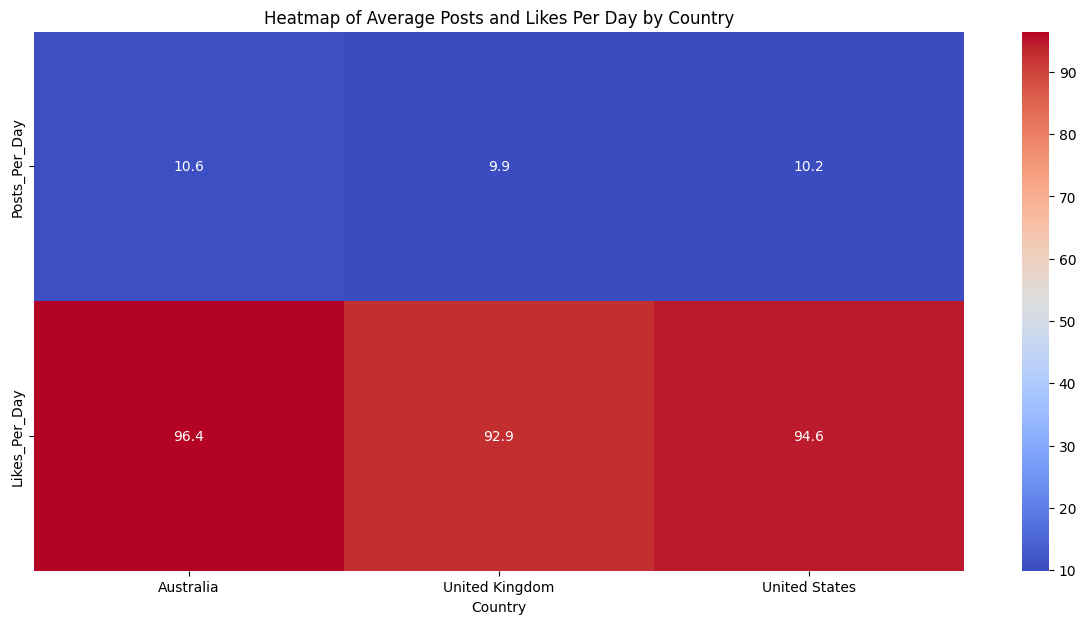

In [31]:
# Calculate the average Posts_Per_Day and Likes_Per_Day per country
country_avg = data.groupby('Country')[['Posts_Per_Day', 'Likes_Per_Day']].mean().reset_index()

# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(country_avg.set_index('Country').T, annot=True, cmap='coolwarm', fmt='.1f')

# Add title
plt.title('Heatmap of Average Posts and Likes Per Day by Country')

# Display the plot
plt.show()


### 11. Demographic vs Engagement Metrics - Cluster Analysis

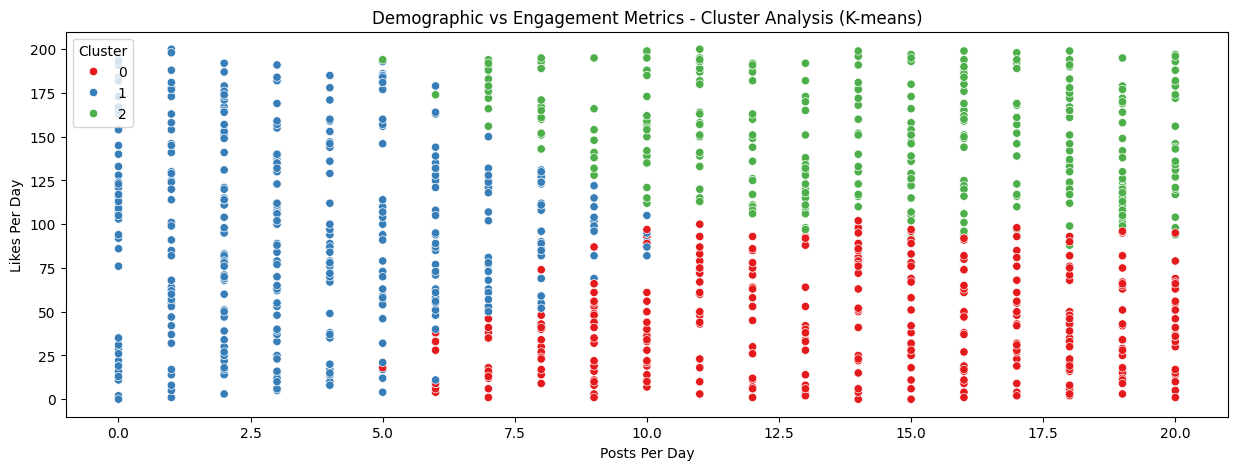

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting engagement metrics for clustering
engagement_data = data[['Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(engagement_data)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plotting the clusters
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data['Posts_Per_Day'], y=data['Likes_Per_Day'], hue=data['Cluster'], palette='Set1')

# Add title and labels
plt.title('Demographic vs Engagement Metrics - Cluster Analysis (K-means)')
plt.xlabel('Posts Per Day')
plt.ylabel('Likes Per Day')

# Display the plot
plt.show()


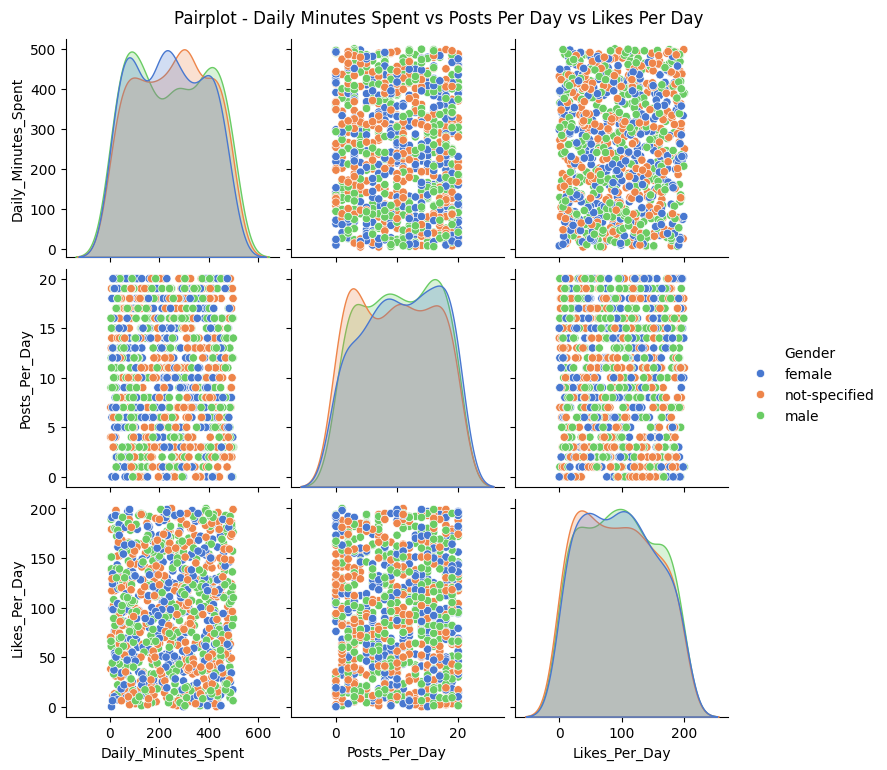

In [36]:
# Plotting the pairplot with different style
sns.pairplot(data, vars=['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day'], hue='Gender', palette='muted')

# Add title
plt.suptitle('Pairplot - Daily Minutes Spent vs Posts Per Day vs Likes Per Day', y=1.02)

# Display the plot
plt.show()


# Advanced Data Insights and Analysis Techniques

## Correlation Heatmap

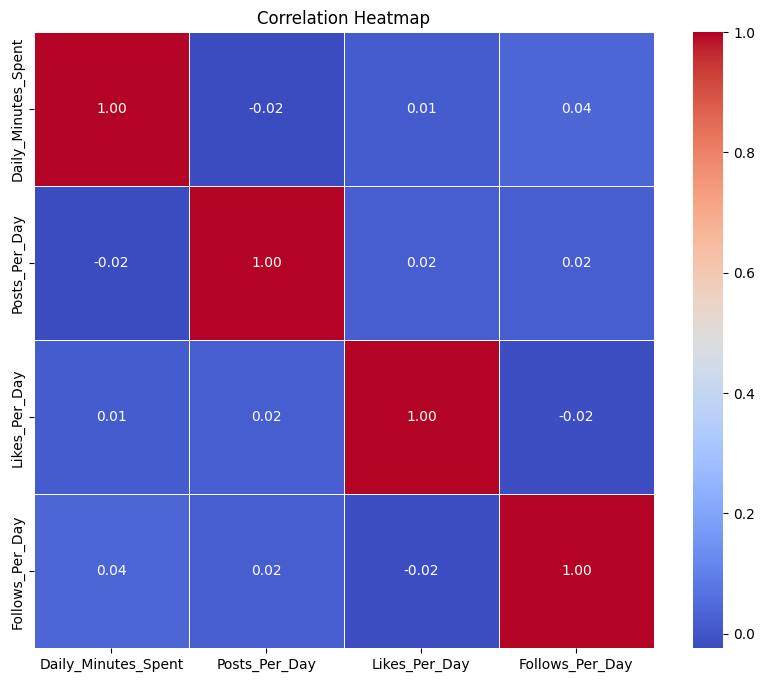

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## User Segmentation

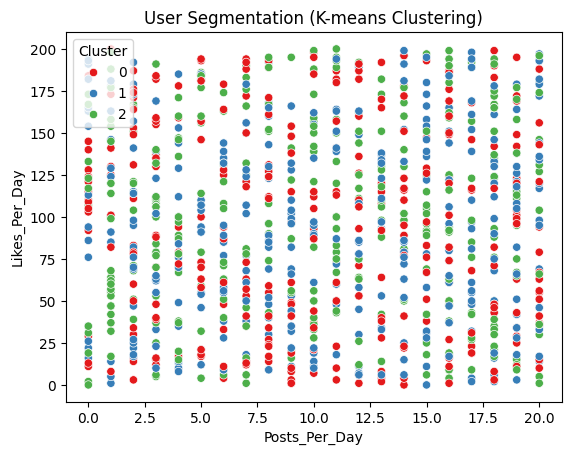

In [40]:
from sklearn.cluster import KMeans
import pandas as pd

# Select relevant features for clustering
features = data[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Plot the clusters
import seaborn as sns
sns.scatterplot(x=data['Posts_Per_Day'], y=data['Likes_Per_Day'], hue=data['Cluster'], palette='Set1')
plt.title('User Segmentation (K-means Clustering)')
plt.show()


## Feature Importance

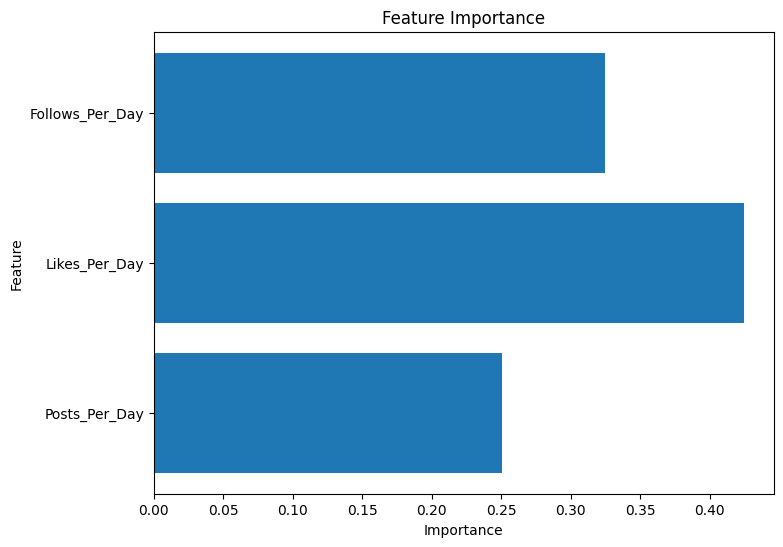

In [41]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define features and target
X = data[['Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']]
y = data['Daily_Minutes_Spent']

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Conclusion

##Conclusion
##Key Insights:

###User Segmentation:
We identified distinct user groups based on activity patterns (e.g., Posts_Per_Day, Likes_Per_Day), enabling more targeted user engagement strategies.

### Feature Importance:
The most influential features impacting user behavior were identified, particularly Posts_Per_Day and Likes_Per_Day, which provide actionable insights for improving app features.
### User Retention:
Even without time-based data, we gained insights into how user behavior varies across different demographics, helping to predict engagement and potential churn.
### App Performance:
Analysis across different apps showed how user engagement (e.g., Daily_Minutes_Spent) varies, highlighting potential areas for improvement in app performance.

###Potential Applications:

###Personalization:
By understanding user behavior clusters and key metrics, personalized content and app experiences can be delivered.
###Marketing Strategy:
Segmenting users into different behavior clusters aids in more effective marketing campaigns, targeting specific user needs and preferences.
###Product Improvement:
The insights into feature importance and user behavior patterns can guide product teams in making data-driven decisions to improve app features.

##Next Steps:

###Further Exploration:
Investigate other user engagement metrics, such as Follows_Per_Day, and how they correlate with app performance.
###Time-based Analysis:
If future data includes time columns, more advanced time series and cohort analysis could be conducted to predict user retention and activity trends over time.
###A/B Testing:
Implement A/B tests to validate insights from clustering and feature importance analysis to optimize user experience.